# Support Vector Machines

In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [30]:
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

In [31]:
X[y == -1] = X[y == -1] +1

In [32]:
X[:,0]

array([ 0.44122749,  2.43077119,  0.10960984, -0.9092324 ,  0.18760323,
       -1.19276461, -0.35882895, -1.66478853,  1.15139101, -1.51117956,
        0.01939211,  0.12812082,  1.99643983,  1.05914424,  1.00328884,
        1.79305332,  0.99380509,  0.94769185,  1.19766009,  0.91312439])

Text(0,0.5,'X[:,1]')

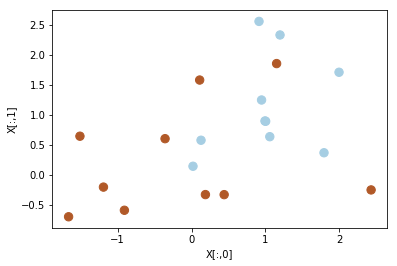

In [33]:
plt.scatter(X[:,0],X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X[:,0]')
plt.ylabel('X[:,1]')

## When we choose c=10

In [34]:
svc= SVC(C=10, kernel='linear')
svcfit= svc.fit(X,y)

Text(0,0.5,'X2')

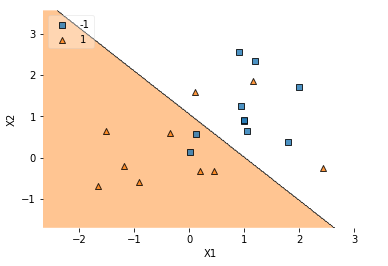

In [37]:
plot_decision_regions(X,y,svcfit, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')

In [40]:
svcfit.support_vectors_

array([[ 0.01939211,  0.14314685],
       [ 0.12812082,  0.57749207],
       [ 1.05914424,  0.63668912],
       [ 1.00328884,  0.89406956],
       [ 1.79305332,  0.36842837],
       [ 0.99380509,  0.89893239],
       [ 0.94769185,  1.24921766],
       [ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [ 0.18760323, -0.32986996],
       [-0.35882895,  0.6034716 ],
       [ 1.15139101,  1.85733101]])

Number of support vector is 13

## When c=0.1

Text(0,0.5,'X2')

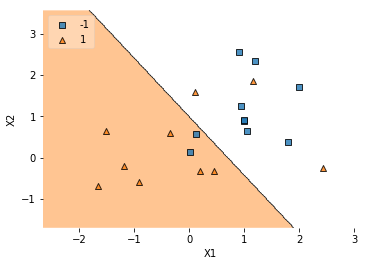

In [39]:
svc2= SVC(C=0.1, kernel='linear')
svcfit2= svc2.fit(X,y)
plot_decision_regions(X,y,svcfit2, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')

In [41]:
svcfit2.support_vectors_

array([[ 0.01939211,  0.14314685],
       [ 0.12812082,  0.57749207],
       [ 1.05914424,  0.63668912],
       [ 1.00328884,  0.89406956],
       [ 1.79305332,  0.36842837],
       [ 0.99380509,  0.89893239],
       [ 0.94769185,  1.24921766],
       [ 0.91312439,  2.56153229],
       [ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [-0.9092324 , -0.59163666],
       [ 0.18760323, -0.32986996],
       [-0.35882895,  0.6034716 ],
       [ 1.15139101,  1.85733101],
       [-1.51117956,  0.64484751]])

Number of support vector is 16

## When choose c=0.01

Text(0,0.5,'X2')

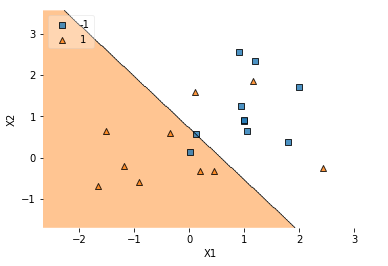

In [42]:
svc3= SVC(C=0.01, kernel='linear')
svcfit3= svc3.fit(X,y)
plot_decision_regions(X,y,svcfit3, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')

In [43]:
svcfit3.support_vectors_

array([[ 0.01939211,  0.14314685],
       [ 0.12812082,  0.57749207],
       [ 1.99643983,  1.71242127],
       [ 1.05914424,  0.63668912],
       [ 1.00328884,  0.89406956],
       [ 1.79305332,  0.36842837],
       [ 0.99380509,  0.89893239],
       [ 0.94769185,  1.24921766],
       [ 1.19766009,  2.33484857],
       [ 0.91312439,  2.56153229],
       [ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [-0.9092324 , -0.59163666],
       [ 0.18760323, -0.32986996],
       [-1.19276461, -0.20487651],
       [-0.35882895,  0.6034716 ],
       [-1.66478853, -0.70017904],
       [ 1.15139101,  1.85733101],
       [-1.51117956,  0.64484751]])

The number of support vector is 20

In [44]:
#generate test dataset
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

## An Application to the Heart Disease Data

In [50]:
#load dataset
heart= pd.read_csv('Dataset/Heart.csv').dropna()
heart= heart.drop('Unnamed: 0', axis=1)
heart.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes  
3      3  0.0      normal   No  
4      1  0.0      normal   No

In [5]:
## fit LDA first
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
heart['Chestpain']= pd.factorize(heart.ChestPain)[0]
heart['Thal2']= pd.factorize(heart.Thal)[0]
X= heart.drop(['AHD', 'ChestPain','Thal'], axis=1)
y= pd.factorize(heart.AHD)[0]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state =1)
lda= LDA()
lda_model =lda.fit(X_train, y_train)
pred = lda_model.predict(X_test)
print('coefficient value {}'.format(lda_model.coef_))
print('mean value {}'.format(lda_model.means_))

NameError: name 'heart' is not defined

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80        51
           1       0.72      0.79      0.76        39

   micro avg       0.78      0.78      0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



In [94]:
## fit SVC
svc_mod= SVC(C=1, kernel='linear')
svc_mod_fit= svc_mod.fit(X_train,y_train)
svc_pred= svc_mod_fit.predict(X_test)
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        45
           1       0.79      0.69      0.74        45

   micro avg       0.76      0.76      0.76        90
   macro avg       0.76      0.76      0.75        90
weighted avg       0.76      0.76      0.75        90



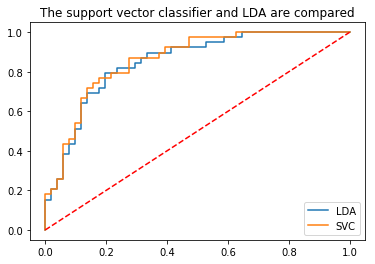

In [91]:
from sklearn import metrics
y_pred_proba_lda = lda_model.predict_proba(X_test)
y_pred_score_svc= svc_mod_fit.decision_function(X_test)
fpr_lda, tpr_lda, _lda = metrics.roc_curve(pd.factorize(y_test)[0],  y_pred_proba_lda[:,1])
fpr_svc, tpr_svc, _svc= metrics.roc_curve(pd.factorize(y_test)[0], y_pred_score_svc)
auc_lda = metrics.roc_auc_score(pd.factorize(y_test)[0], y_pred_proba_lda[:,1])
auc_svc = metrics.roc_auc_score(pd.factorize(y_test)[0], y_pred_score_svc)
plt.plot(fpr_lda,tpr_lda,label="LDA")
plt.plot(fpr_svc, tpr_svc, label ='SVC')
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.title('The support vector classifier and LDA are compared')
plt.show()

In [95]:
## Now compare with SVM
svm1= SVC(C=1, kernel='rbf', gamma=0.1)
svm1.fit(X_train, y_train)
svm1_pred= svm1.predict(X_test)
print(classification_report(svm1_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.56      0.71        89
           1       0.00      0.00      0.00         1

   micro avg       0.56      0.56      0.56        90
   macro avg       0.49      0.28      0.36        90
weighted avg       0.97      0.56      0.71        90



In [96]:
svm2= SVC(C=1, kernel='rbf', gamma=0.01)
svm2.fit(X_train, y_train)
svm2_pred= svm2.predict(X_test)
print(classification_report(svm2_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71        65
           1       0.38      0.60      0.47        25

   micro avg       0.62      0.62      0.62        90
   macro avg       0.59      0.62      0.59        90
weighted avg       0.69      0.62      0.64        90



In [97]:
svm3= SVC(C=1, kernel='rbf', gamma=0.001)
svm3.fit(X_train, y_train)
svm3_pred= svm3.predict(X_test)
print(classification_report(svm3_pred, y_test))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        48
           1       0.64      0.60      0.62        42

   micro avg       0.66      0.66      0.66        90
   macro avg       0.65      0.65      0.65        90
weighted avg       0.65      0.66      0.65        90



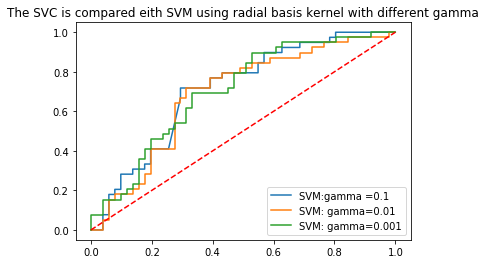

In [114]:
from sklearn import metrics

y_pred_score_svm1= svm1.decision_function(X_test)
y_pred_score_svm2= svm2.decision_function(X_test)
y_pred_score_svm3= svm3.decision_function(X_test)


fpr_svm1, tpr_svm1, _svm1= metrics.roc_curve(pd.factorize(y_test)[0], y_pred_score_svm1)
fpr_svm2, tpr_svm2, _svm2= metrics.roc_curve(pd.factorize(y_test)[0], y_pred_score_svm2)
fpr_svm3, tpr_svm3, _svm3= metrics.roc_curve(pd.factorize(y_test)[0], y_pred_score_svm3)

auc_svm1 = metrics.roc_auc_score(pd.factorize(y_test)[0], y_pred_score_svm1)
auc_svm2 = metrics.roc_auc_score(pd.factorize(y_test)[0], y_pred_score_svm2)
auc_svm3 = metrics.roc_auc_score(pd.factorize(y_test)[0], y_pred_score_svm3)



plt.plot(fpr_svm1,tpr_svm1,label="SVM:gamma =0.1")
plt.plot(fpr_svm2, tpr_svm2, label ='SVM: gamma=0.01')
plt.plot(fpr_svm3, tpr_svm3, label ='SVM: gamma=0.001')

plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.title('The SVC is compared eith SVM using radial basis kernel with different gamma')
plt.show()

In [110]:
print(auc_svm1)
print(auc_svm2)
print(auc_svm3)

0.709904474610357
0.6862745098039216
0.7023629964806436


In [127]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.001,0.01,0.1,1,5]}]

from sklearn.model_selection import GridSearchCV
tune_out= GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)

In [128]:
tune_out.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [129]:
tune_out.best_params_

{'C': 1, 'gamma': 0.001}

## Application to Gene Expression Data

In [132]:
xtrain= pd.read_csv('Dataset/Khan_xtrain.csv').drop('Unnamed: 0',axis=1)

In [133]:
xtrain.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.773344 -2.438405 -0.482562 -2.721135 -1.217058  0.827809  1.342604   
1 -0.078178 -2.415754  0.412772 -2.825146 -0.626236  0.054488  1.429498   
2 -0.084469 -1.649739 -0.241307 -2.875286 -0.889405 -0.027474  1.159300   
3  0.965614 -2.380547  0.625297 -1.741256 -0.845366  0.949687  1.093801   
4  0.075664 -1.728785  0.852626  0.272695 -1.841370  0.327936  1.251219   

         V8        V9       V10    ...        V2299     V2300     V2301  \
0  0.057042  0.133569  0.565427    ...    -0.238511 -0.027474 -1.660205   
1 -0.120249  0.456792  0.159053    ...    -0.657394 -0.246284 -0.836325   
2  0.015676  0.191942  0.496585    ...    -0.696352  0.024985 -1.059872   
3  0.819736 -0.284620  0.994732    ...     0.259746  0.357115 -1.893128   
4  0.771450  0.030917  0.278313    ...    -0.200404  0.061753 -2.273998   

      V2302     V2303     V2304     V2305     V2306     V2307     V2308  
0  0.588231 -0.463624 -3.952845 -5.496768 -1.414282 -0.647600 -1.763172  
1 -0.571284  0.034788 -2.478130 -3.661264 -1.093923 -1.209320 -0.824395  
2 -0.403767 -0.678653 -2.939352 -2.736450 -1.965399 -0.805868 -1.139434  
3  0.255107  0.163309 -1.021929 -2.077843 -1.127629  0.331531 -2.179483  
4 -0.039365  0.368801 -2.566551 -1.675044 -1.082050 -0.965218 -1.836966  

[5 rows x 2308 columns]

In [134]:
xtrain.shape

(63, 2308)

In [155]:
ytrain= pd.read_csv('Dataset/Khan_ytrain.csv').drop('Unnamed: 0',axis=1)

In [157]:
ytrain.shape

(63, 1)

In [142]:
xtest= pd.read_csv('Dataset/Khan_xtest.csv').drop('Unnamed: 0',axis=1)

In [143]:
xtest.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.139501 -1.168927  0.564973 -3.366796 -1.323132 -0.692547  2.327395   
1  1.164275 -2.018158  1.103533 -2.165435 -1.440117 -0.437420  2.661587   
2  0.841093  0.254720 -0.208748 -2.148149 -1.512765 -1.263723  2.946642   
3  0.685065 -1.927579 -0.233068 -1.640413 -1.008954  0.774451  1.617168   
4 -1.956163 -2.234926  0.281563 -2.695628 -1.214697 -1.059872  2.498070   

         V8        V9       V10    ...        V2299     V2300     V2301  \
0  0.923703  0.112167  0.509765    ...    -0.180803 -0.942635 -1.210662   
1  1.224011  0.210504  1.045563    ...    -0.709480 -1.532940 -2.385967   
2  0.087828  0.482920  1.063020    ...    -0.067958 -1.854060 -1.541312   
3 -0.567925  0.036621 -0.101701    ...     1.077559 -0.263966 -1.966113   
4  0.780196  1.041583  0.727500    ...    -1.209320 -0.693147 -1.846427   

      V2302     V2303     V2304     V2305     V2306     V2307     V2308  
0 -0.588787 -0.070422 -2.783852 -2.840439 -1.160913 -0.343054 -0.055513  
1 -0.389641  0.422781 -2.816750 -2.422495 -1.722607 -1.703749 -1.699910  
2 -1.773723 -1.879935 -2.265289 -2.405726 -0.176379 -0.128743 -0.996417  
3 -1.086190  0.885914 -0.248590  0.385874 -0.508163 -0.626985 -0.699366  
4 -0.993442 -3.294138 -3.332605 -2.282782 -0.656622 -2.012157 -1.668657  

[5 rows x 2308 columns]

In [144]:
xtest.shape

(20, 2308)

In [147]:
ytest=pd.read_csv('Dataset/Khan_ytest.csv').drop('Unnamed: 0',axis=1)

In [159]:
ytrain.x.value_counts()

2    23
4    20
3    12
1     8
Name: x, dtype: int64

In [160]:
ytest.x.value_counts()

3    6
2    6
4    5
1    3
Name: x, dtype: int64

In [168]:
out= SVC(kernel='linear')
out.fit(xtrain,ytrain)
khan_pred= out.predict(xtest)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
cm= metrics.confusion_matrix(ytrain, out.predict(xtrain))
pd.DataFrame(cm, index= out.classes_, columns=out.classes_)

1   2   3   4
1  8   0   0   0
2  0  23   0   0
3  0   0  12   0
4  0   0   0  20

In [172]:
cm2= metrics.confusion_matrix(ytest, khan_pred)
pd.DataFrame(cm2, index= out.classes_, columns=out.classes_)

1  2  3  4
1  3  0  0  0
2  0  6  0  0
3  0  2  4  0
4  0  0  0  5

## Exercise using Auto Dataset

In [56]:
auto= pd.read_csv('Dataset/Auto.csv').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 31.0+ KB


In [63]:
auto['hp']= auto.horsepower.replace('?',None, regex=True).astype(float)
auto.drop('horsepower', axis=1)
auto.dropna()
auto.shape
x= auto.drop(['name','mpg', 'horsepower'], axis =1).dropna()
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 7 columns):
cylinders       397 non-null int64
displacement    397 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
hp              397 non-null float64
dtypes: float64(3), int64(4)
memory usage: 24.8 KB


Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.

In [64]:
import statistics
med=  statistics.median(auto.mpg)
y= np.where(auto.mpg >med, 1,0)

Fit a support vector classifier to the data with various values
of cost, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of this parameter. Comment on your results

In [65]:
c_parameters = [{'C': [0.01, 0.1, 1, 10, 100]}]

from sklearn.model_selection import GridSearchCV
tune_c= GridSearchCV(SVC(kernel='linear'), c_parameters, cv=6, scoring='accuracy', return_train_score=True)

In [66]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state =1)
tune_c.fit(x_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [67]:
tune_c.best_params_

{'C': 1}

In [68]:
best_c= SVC(kernel='linear', C=1)
best_c.fit(x_train, y_train)
best_c_pred= best_c.predict(x_test)

In [70]:
from sklearn import metrics
metrics.confusion_matrix(y_test, best_c_pred)

array([[57,  5],
       [ 9, 49]])

Now repeat (b), this time using SVMs with radial and polynomial
basis kernels, with different values of gamma and degree and
cost. Comment on your results

In [75]:
cg_parameters = [{'C': [0.01, 0.1, 1, 10, 100], 'gamma':[0.01,0.1,1,2,3]}]

tune_cg= GridSearchCV(SVC(kernel='rbf'), cg_parameters, cv=6, scoring='accuracy', return_train_score=True)

In [76]:
tune_cg.fit(x_train, y_train)
tune_cg.best_params_

{'C': 10, 'gamma': 0.01}

In [77]:
best_cg= SVC(kernel='rbf', C=10, gamma=0.01)
best_cg.fit(x_train, y_train)
best_cg_pred= best_cg.predict(x_test)
metrics.confusion_matrix(y_test, best_cg_pred)

array([[59,  3],
       [29, 29]])